<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 05-10-2023
```








**Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from google.colab import drive
from sklearn.metrics import accuracy_score

**Mounting Google Drive in Google Colab**

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Load custom images from Google Drive**

In [3]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/TME_6015/Assignment_1/7
filename 7-1.jpg
filename 7-2.png
filename 7-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/1
filename 1-1.jpg
filename 1-2.png
filename 1-3`.png
/content/drive/MyDrive/TME_6015/Assignment_1/2
filename 2-1.jpg
filename 2-2.png
filename 2-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/3
filename 3-1.jpg
filename 3-2.png
filename 3-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/4
filename 4-1.jpg
filename 4-2.png
filename 4-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/5
filename 5-1.jpg
filename 5-2.png
filename 5-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/6
filename 6-1.jpg
filename 6-2.png
filename 6-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/8
filename 8-1.jpg
filename 8-2.png
filename 8-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/9
filename 9-1.jpg
filename 9-2.png
filename 9-3.png
/content/drive/MyDrive/TME_6015/Assignment_1/0
filename 0-1.jpg
filename 0-2.png
filename 0-3.png


In [4]:
display_image = custom_images[2] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

**Plotting the data**

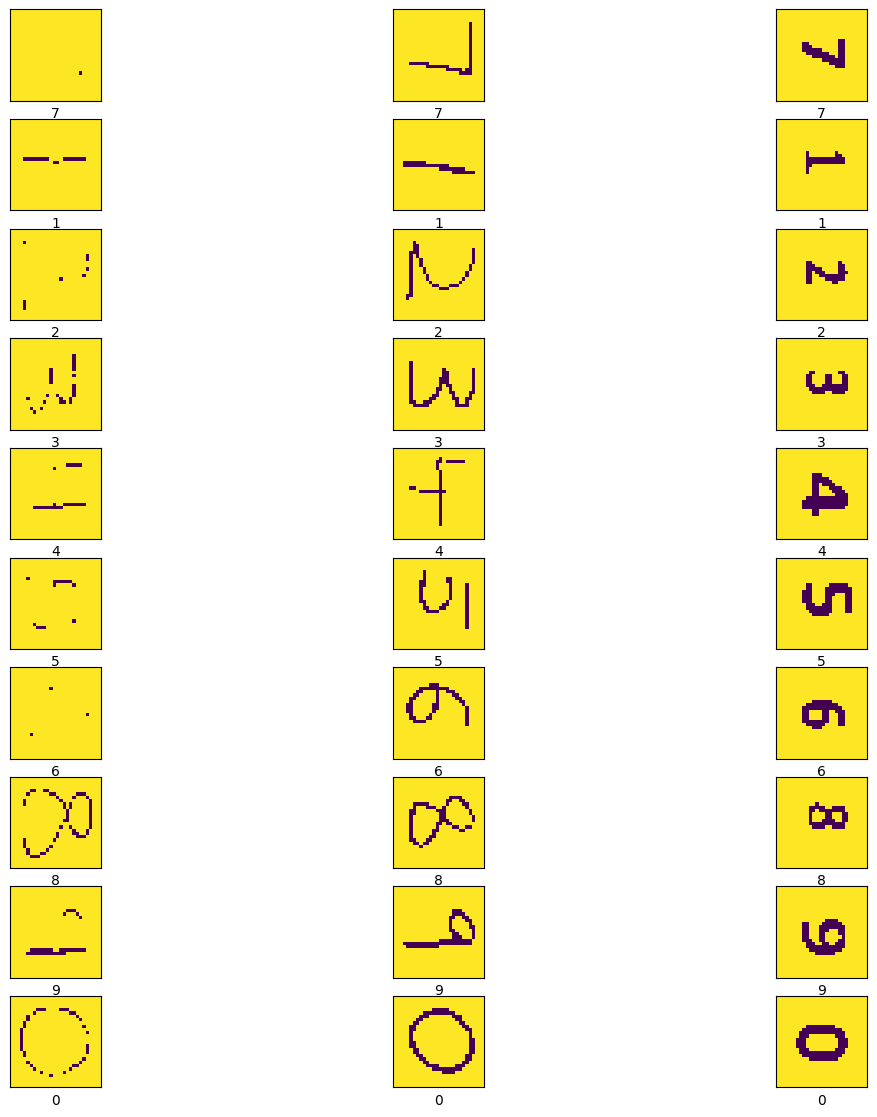

In [5]:
plt.figure(figsize=(14,14))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(custom_images[i])
    plt.xlabel(custom_labels[i])
plt.show()

**Load and Preprocess MNIST Dataset**

In [6]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Adding the custom images and labels to the original MNIST dataset**

In [7]:
# Add the custom images and labels to the original MNIST dataset
x_train = np.concatenate((x_train, custom_images), axis=0)
y_train = np.concatenate((y_train, custom_labels), axis=0)

In [8]:
display_image = x_train[0] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

**Create a Model**

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

**Compile and Train the Model**

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 61s 32ms/step - loss: 0.2433 - accuracy: 0.9414 - val_loss: 0.0586 - val_accuracy: 0.9805
Epoch 2/10
1876/1876 [==============================] - 69s 37ms/step - loss: 0.0661 - accuracy: 0.9799 - val_loss: 0.0505 - val_accuracy: 0.9829
Epoch 3/10
1876/1876 [==============================] - 61s 33ms/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0616 - val_accuracy: 0.9811
Epoch 4/10
1876/1876 [==============================] - 65s 34ms/step - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0474 - val_accuracy: 0.9860
Epoch 5/10
1876/1876 [==============================] - 59s 32ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0403 - val_accuracy: 0.9870
Epoch 6/10
1876/1876 [==============================] - 84s 45ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 7/10
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0532 -

**Plot Training History**

313/313 - 2s - loss: 0.0530 - accuracy: 0.9887 - 2s/epoch - 7ms/step


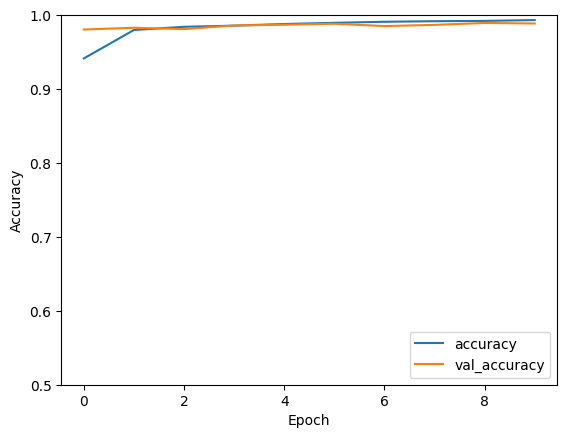

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [13]:
print(test_acc)

0.9886999726295471


**Detect Overfitting**

---

We will Train the model for more epochs until you observe overfitting in the training data (i.e., when validation accuracy starts decreasing while training accuracy keeps increasing).

---

Here we will run two models to check overffitting on them. First model has less parameters compared to the next one.



**Model -1**

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
1876/1876 [==============================] - 36s 19ms/step - loss: 0.3269 - accuracy: 0.9317 - val_loss: 0.1087 - val_accuracy: 0.9696
Epoch 2/25
1876/1876 [==============================] - 34s 18ms/step - loss: 0.0840 - accuracy: 0.9753 - val_loss: 0.0825 - val_accuracy: 0.9764
Epoch 3/25
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0905 - val_accuracy: 0.9755
Epoch 4/25
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.1037 - val_accuracy: 0.9734
Epoch 5/25
1876/1876 [==============================] - 33s 17ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.0925 - val_accuracy: 0.9773
Epoch 6/25
1876/1876 [==============================] - 35s 19ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.1093 - val_accuracy: 0.9788
Epoch 7/25
1876/1876 [==============================] - 33s 17ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.1119 -

**After 17 Epoch, We can see the validation accuracy has reached its peak of 98 percent then it decreases from that value**

313/313 - 1s - loss: 0.2720 - accuracy: 0.9812 - 1s/epoch - 4ms/step


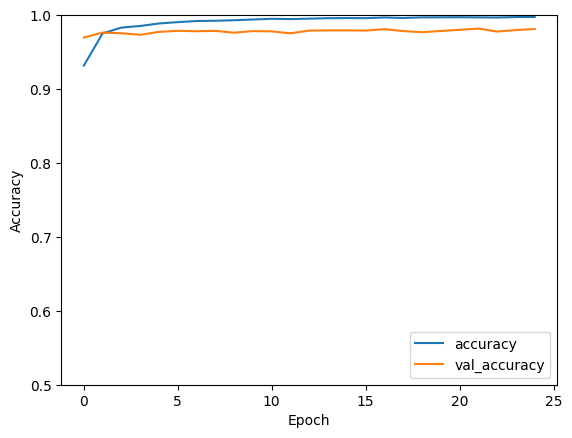

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [19]:
print(test_acc)

0.9811999797821045


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=18,
                    validation_data=(x_test, y_test))

Epoch 1/18
1876/1876 [==============================] - 59s 31ms/step - loss: 0.2130 - accuracy: 0.9483 - val_loss: 0.0624 - val_accuracy: 0.9801
Epoch 2/18
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0596 - accuracy: 0.9823 - val_loss: 0.0502 - val_accuracy: 0.9845
Epoch 3/18
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0480 - val_accuracy: 0.9868
Epoch 4/18
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0393 - val_accuracy: 0.9886
Epoch 5/18
1876/1876 [==============================] - 60s 32ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0330 - val_accuracy: 0.9898
Epoch 6/18
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0459 - val_accuracy: 0.9883
Epoch 7/18
1876/1876 [==============================] - 66s 35ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0553 -

**After 11 Epoch,We can see the validation accuracy has reached its peak of 98.9 percent then it decreases from that value**

313/313 - 3s - loss: 0.0561 - accuracy: 0.9887 - 3s/epoch - 9ms/step


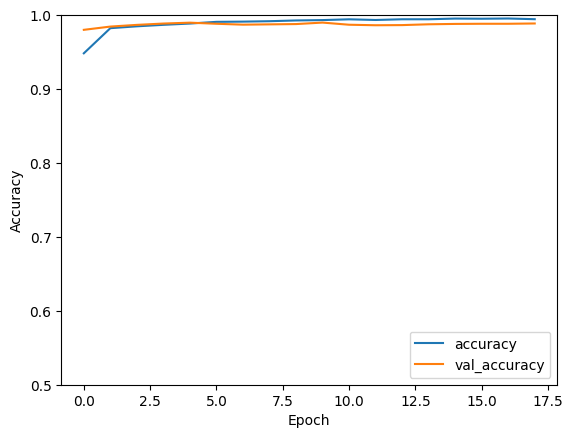

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [25]:
print(test_acc)

0.9886999726295471


**Experiment with Different Configurationst**

**Model - 1**

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                346176    
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 38s 19ms/step - loss: 0.5261 - accuracy: 0.9003 - val_loss: 0.1254 - val_accuracy: 0.9680
Epoch 2/10
1876/1876 [==============================] - 36s 19ms/step - loss: 0.0987 - accuracy: 0.9718 - val_loss: 0.0969 - val_accuracy: 0.9739
Epoch 3/10
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0672 - accuracy: 0.9799 - val_loss: 0.0898 - val_accuracy: 0.9775
Epoch 4/10
1876/1876 [==============================] - 33s 18ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0903 - val_accuracy: 0.9769
Epoch 5/10
1876/1876 [==============================] - 31s 17ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.1094 - val_accuracy: 0.9734
Epoch 6/10
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0901 - val_accuracy: 0.9779
Epoch 7/10
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.1006 -

**Curve - 1**

313/313 - 1s - loss: 0.1125 - accuracy: 0.9783 - 1s/epoch - 4ms/step


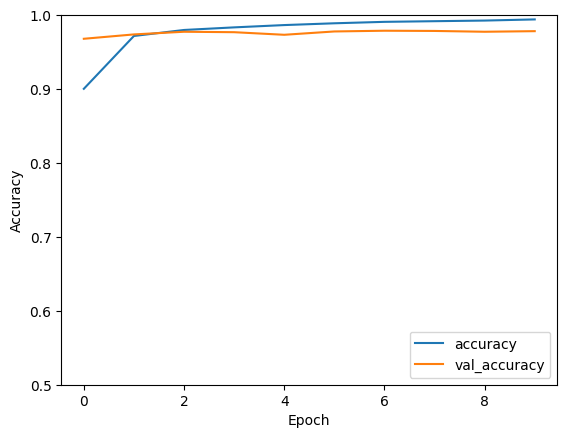

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [31]:
print(test_acc)

0.9782999753952026


**Model - 2**

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 7744)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                495680    
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 62s 33ms/step - loss: 0.2841 - accuracy: 0.9524 - val_loss: 0.0923 - val_accuracy: 0.9716
Epoch 2/10
1876/1876 [==============================] - 59s 32ms/step - loss: 0.0653 - accuracy: 0.9805 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 3/10
1876/1876 [==============================] - 64s 34ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0610 - val_accuracy: 0.9824
Epoch 4/10
1876/1876 [==============================] - 59s 32ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0591 - val_accuracy: 0.9836
Epoch 5/10
1876/1876 [==============================] - 61s 32ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0552 - val_accuracy: 0.9854
Epoch 6/10
1876/1876 [==============================] - 59s 32ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0702 - val_accuracy: 0.9842
Epoch 7/10
1876/1876 [==============================] - 63s 34ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0599 -

**Curve - 2**

313/313 - 4s - loss: 0.1018 - accuracy: 0.9828 - 4s/epoch - 13ms/step


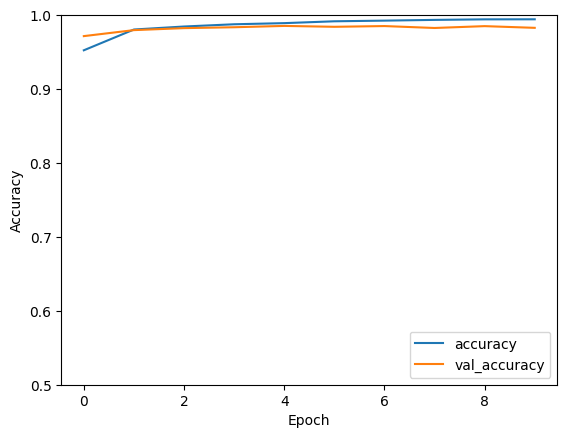

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [37]:
print(test_acc)

0.9828000068664551


**Model - 3**

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1876/1876 [==============================] - 61s 32ms/step - loss: 0.2309 - accuracy: 0.9446 - val_loss: 0.0620 - val_accuracy: 0.9803
Epoch 2/10
1876/1876 [==============================] - 58s 31ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 3/10
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 4/10
1876/1876 [==============================] - 59s 31ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0466 - val_accuracy: 0.9859
Epoch 5/10
1876/1876 [==============================] - 57s 30ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0499 - val_accuracy: 0.9857
Epoch 6/10
1876/1876 [==============================] - 56s 30ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0483 - val_accuracy: 0.9877
Epoch 7/10
1876/1876 [==============================] - 57s 30ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0434 -

**Curve - 3**

313/313 - 2s - loss: 0.0537 - accuracy: 0.9893 - 2s/epoch - 7ms/step


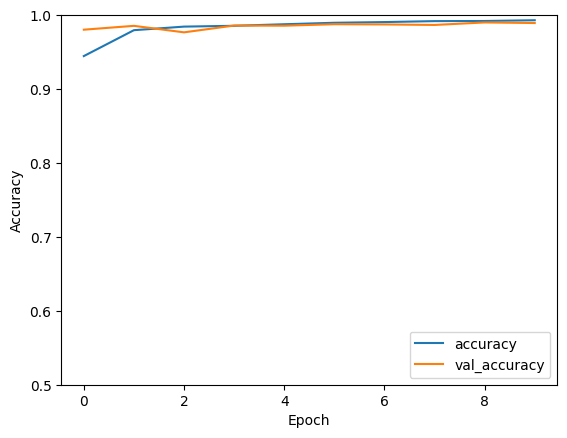

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [43]:
print(test_acc)

0.989300012588501


**Create a Custom Test Set**

In [44]:
custom_test_images = []
custom_test_labels = []
folder_path = '/content/drive/MyDrive/TME_6015/Assignment_1_Custom_Test_Data'
for filename in os.listdir(folder_path):
  print('filename : ', filename)
  if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG') or filename.endswith('.jpg') or filename.endswith('.JPEG') or filename.endswith('.jpeg'):
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path).convert('L')
    img = img.resize((28, 28))
    threshold = 100
    img = img.point(lambda p: p > threshold and 255)
    img_array = np.array(img)
    custom_test_images.append(img_array)
    custom_test_labels.append(int(filename[0]))

# Convert the list of custom images and labels to numpy arrays
custom_test_images = np.array(custom_test_images)
custom_test_labels = np.array(custom_test_labels)


filename :  1.png
filename :  2.png
filename :  3.png
filename :  4.png
filename :  5.png
filename :  6.png
filename :  7.png
filename :  8.png
filename :  9.png
filename :  0.png


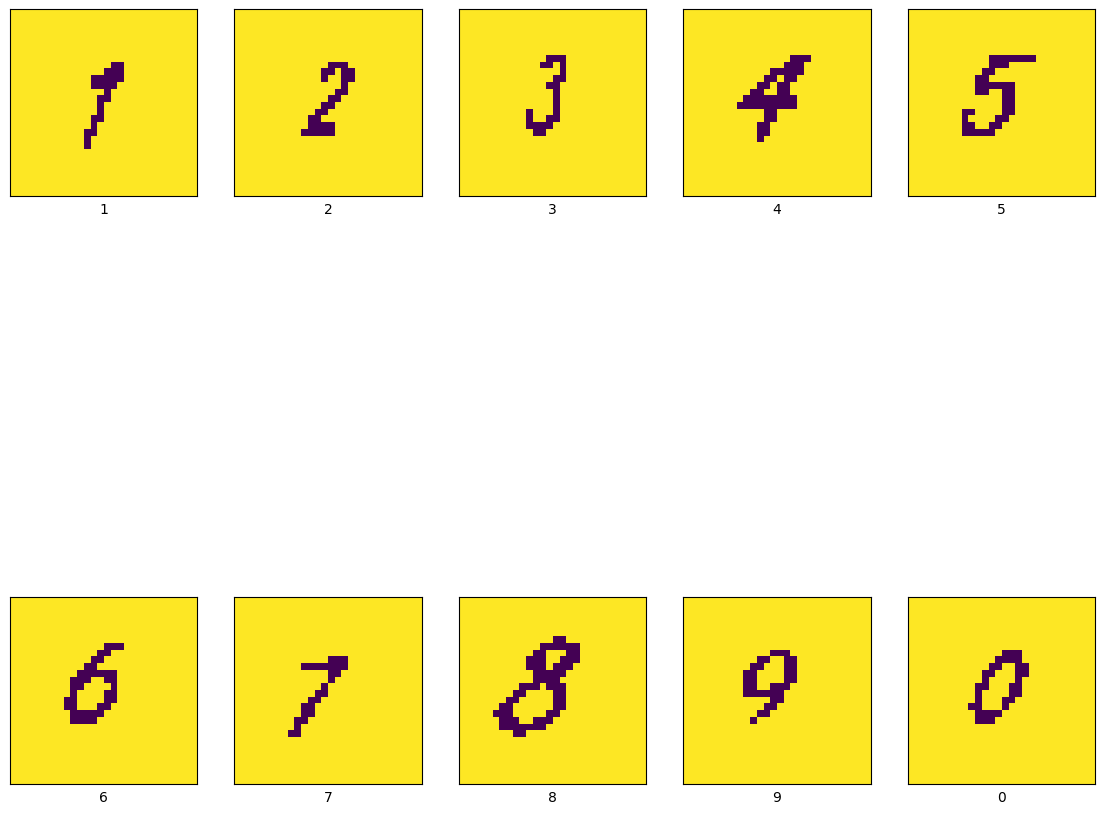

In [45]:
plt.figure(figsize=(14,14))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(custom_test_images[i])
    plt.xlabel(custom_test_labels[i])
plt.show()

In [46]:
custom_test_labels, len(custom_test_labels)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]), 10)

In [47]:
custom_test_pred=model.predict(custom_test_images)

1/1 [==============================] - 0s 123ms/step


In [48]:
custom_test_pred[0]

array([ 1.8333828e+00, -2.8141439e-03,  1.1896887e+00, -1.6005188e+00,
       -8.4234840e-01, -6.5162450e-01, -2.8606820e+00,  1.0017333e+00,
        7.5910008e-01,  1.2536244e+00], dtype=float32)

In [49]:
custom_test_pred=list(map(lambda p: np.argmax(p), custom_test_pred))

In [50]:
for i in range(len(custom_test_pred)):
  print(custom_test_labels[i],custom_test_pred[i])

1 0
2 2
3 9
4 9
5 9
6 7
7 7
8 7
9 2
0 0


In [51]:
print(accuracy_score(custom_test_labels, custom_test_pred)*100)

30.0
